# 0-1 KnapSack

In [106]:
import random
import time
import matplotlib.pyplot as plt
%matplotlib inline
import unittest
import numpy as np
import pandas as pd

import sys

#### RECURSION 

In [107]:
def knapsack_recursive(capacity, weights, values, n):
    def helper(capacity, weights, values, n, calls):
        if n == 0 or capacity == 0:
            return 0, calls, 1
        calls += 1
        if weights[n - 1] > capacity:
            result, calls, dp_entries = helper(capacity, weights, values, n - 1, calls)
            return result, calls, dp_entries + 1
        else:
            include_result, calls, dp_entries1 = helper(capacity - weights[n - 1], weights, values, n - 1, calls)
            exclude_result, calls, dp_entries2 = helper(capacity, weights, values, n - 1, calls)
            dp_entries = dp_entries1 + dp_entries2 + 1
            return max(values[n - 1] + include_result, exclude_result), calls, dp_entries

    result, calls, dp_entries = helper(capacity, weights, values, n, 0)
    return result, calls, dp_entries

#### Top Down Using Memoization

In [108]:
def knapsack_memoization(capacity, weights, values, n):
    memo = [[-1 for _ in range(capacity + 1)] for _ in range(n + 1)]

    def helper(capacity, weights, values, n, calls):
        if n == 0 or capacity == 0:
            return 0, calls, 1
        calls += 1
        if memo[n][capacity] != -1:
            return memo[n][capacity], calls, 1
        if weights[n - 1] > capacity:
            result, calls, dp_entries = helper(capacity, weights, values, n - 1, calls)
            memo[n][capacity] = result
            return result, calls, dp_entries
        else:
            include_result, calls, dp_entries1 = helper(capacity - weights[n - 1], weights, values, n - 1, calls)
            exclude_result, calls, dp_entries2 = helper(capacity, weights, values, n - 1, calls)
            dp_entries = dp_entries1 + dp_entries2 + 1
            memo[n][capacity] = max(values[n - 1] + include_result, exclude_result)
            return memo[n][capacity], calls, dp_entries

    result, calls, dp_entries = helper(capacity, weights, values, n, 0)
    return result, calls, dp_entries


#### Bottom Up Approuch

In [109]:
def knapsack_bottom_up(capacity, weights, values, n):
    dp = [[0] * (capacity + 1) for _ in range(n + 1)]
    dp_entries = 0

    for i in range(1, n + 1):
        for w in range(1, capacity + 1):
            dp_entries += 1
            if weights[i - 1] <= w:
                dp[i][w] = max(values[i - 1] + dp[i - 1][w - weights[i - 1]], dp[i - 1][w])
            else:
                dp[i][w] = dp[i - 1][w]

    return dp[n][capacity], dp_entries

Data Size: 10
Recursive Algorithm - Time: 0.0029990673065185547, Calls: 9841
Memoization - Time: 0.0, Calls: 241
Bottom-Up DP - Time: 0.0, DP Table Entries: 120

Data Size: 20
Recursive Algorithm - Time: 110.45915484428406, Calls: 581130733
Memoization - Time: 0.001010894775390625, Calls: 2281
Bottom-Up DP - Time: 0.0, DP Table Entries: 1140

In [110]:
import time
import random
execution_times_recursive = []
execution_times_memoization = []
execution_times_bottom_up = []
total_calls_recursive = []
total_calls_memoization = []
total_calls_bottom_up = []
total_dp_entries_recursive = []
total_dp_entries_memoization = []
total_dp_entries_bottom_up = []
def analyze_knapsack_algorithms(data_sizes):
    

    for n in data_sizes:
        weights = [random.randint(1, 100) for i in range(n)]
        values = [random.randint(1, 100) for i in range(n)]
        capacity = random.randint(1, 1000)
        print(f"Data Size: {n}")

        # Recursive Algorithm
        start_time = time.perf_counter()
        result, calls, dp_entries = knapsack_recursive(capacity, weights, values, n)
        end_time = time.perf_counter()
        print(f"Recursive Algorithm - Time: {end_time - start_time}, Calls: {calls}, DP Entries: {dp_entries}")
        execution_times_recursive.append(end_time - start_time)
        total_calls_recursive.append(calls)
        total_dp_entries_recursive.append(dp_entries)

        # Recursive with Memoization
        start_time = time.perf_counter()
        result, calls, dp_entries = knapsack_memoization(capacity, weights, values, n)
        end_time = time.perf_counter()
        print(f"Memoization - Time: {end_time - start_time}, Calls: {calls}, DP Entries: {dp_entries}")
        execution_times_memoization.append(end_time - start_time)
        total_calls_memoization.append(calls)
        total_dp_entries_memoization.append(dp_entries)
         

        # Bottom-Up DP
        start_time = time.perf_counter()
        result, dp_entries = knapsack_bottom_up(capacity, weights, values, n)
        end_time = time.perf_counter()
        print(f"Bottom-Up DP - Time: {end_time - start_time}, DP Entries: {dp_entries}\n")
        execution_times_bottom_up.append(end_time - start_time)
        total_calls_bottom_up.append(calls)
        total_dp_entries_bottom_up.append(dp_entries)

    return (execution_times_recursive, execution_times_memoization, execution_times_bottom_up,
            total_calls_recursive, total_calls_memoization, total_calls_bottom_up,
            total_dp_entries_recursive, total_dp_entries_memoization, total_dp_entries_bottom_up)

data_sizes = [5,10,15,20,22,25]
results = analyze_knapsack_algorithms(data_sizes)



Data Size: 5
Recursive Algorithm - Time: 2.340000355616212e-05, Calls: 31, DP Entries: 63
Memoization - Time: 0.00013339999713934958, Calls: 31, DP Entries: 63
Bottom-Up DP - Time: 0.0007580000019515865, DP Entries: 3085

Data Size: 10
Recursive Algorithm - Time: 1.8500002624932677e-05, Calls: 64, DP Entries: 87
Memoization - Time: 3.309999738121405e-05, Calls: 64, DP Entries: 45
Bottom-Up DP - Time: 5.96999961999245e-05, DP Entries: 400

Data Size: 15
Recursive Algorithm - Time: 0.014829300002020318, Calls: 32767, DP Entries: 65535
Memoization - Time: 0.0025957000034395605, Calls: 4997, DP Entries: 6199
Bottom-Up DP - Time: 0.003399000001081731, DP Entries: 12525

Data Size: 20


Recursive Algorithm - Time: 0.3537112999983947, Calls: 954561, DP Entries: 1750352
Memoization - Time: 0.0024435000013909303, Calls: 7412, DP Entries: 7855
Bottom-Up DP - Time: 0.001711399992927909, DP Entries: 7260

Data Size: 22
Recursive Algorithm - Time: 0.6466600999992806, Calls: 1963457, DP Entries: 3287572
Memoization - Time: 0.00373070000205189, Calls: 11374, DP Entries: 11783
Bottom-Up DP - Time: 0.004187200000160374, DP Entries: 12870

Data Size: 25
Recursive Algorithm - Time: 5.315945099995588, Calls: 15418012, DP Entries: 26617566
Memoization - Time: 0.00491669999610167, Calls: 15532, DP Entries: 15995
Bottom-Up DP - Time: 0.0035094000049866736, DP Entries: 14600



In [111]:
data1 = list()
data_sizes= np.array(data_sizes)
for i in range(len(execution_times_bottom_up)):
    data1.append([execution_times_recursive[i],execution_times_memoization[i],execution_times_bottom_up[i]])
df = pd.DataFrame(data1,columns=['execution_times_recursive','execution_times_memoization','execution_times_bottom_up'])
df.set_index(data_sizes,inplace=True)
df

,execution_times_recursive,execution_times_memoization,execution_times_bottom_up
5,0.000023,0.000133,0.000758
10,0.000019,0.000033,0.000060
15,0.014829,0.002596,0.003399
20,0.353711,0.002444,0.001711
22,0.646660,0.003731,0.004187
25,5.315945,0.004917,0.003509


In [112]:
total_calls_recursive,total_calls_memoization,total_calls_bottom_up

([31, 64, 32767, 954561, 1963457, 15418012],
 [31, 64, 4997, 7412, 11374, 15532],
 [31, 64, 4997, 7412, 11374, 15532])

In [113]:
data2 = list()
data_sizes= np.array(data_sizes)
for i in range(len(total_calls_recursive)):
    data2.append([total_calls_recursive[i],total_calls_memoization[i],total_calls_bottom_up[i]])
df = pd.DataFrame(data2,columns=['total_calls_recursive','total_calls_memoization','total_calls_bottom_up'])
df.set_index(data_sizes,inplace=True)
df



,total_calls_recursive,total_calls_memoization,total_calls_bottom_up
5,31,31,31
10,64,64,64
15,32767,4997,4997
20,954561,7412,7412
22,1963457,11374,11374
25,15418012,15532,15532


In [114]:
data3 = list()
data_sizes= np.array(data_sizes)
for i in range(len(total_calls_recursive)):
    data3.append([total_dp_entries_recursive[i],total_dp_entries_memoization[i],total_dp_entries_bottom_up[i]])
df = pd.DataFrame(data3,columns=['total_dp_recursive','total_dp_memoization','total_dp_bottom_up'])
df.set_index(data_sizes,inplace=True)
df

,total_dp_recursive,total_dp_memoization,total_dp_bottom_up
5,63,63,3085
10,87,45,400
15,65535,6199,12525
20,1750352,7855,7260
22,3287572,11783,12870
25,26617566,15995,14600


In [115]:
total_dp_entries_bottom_up

[3085, 400, 12525, 7260, 12870, 14600]

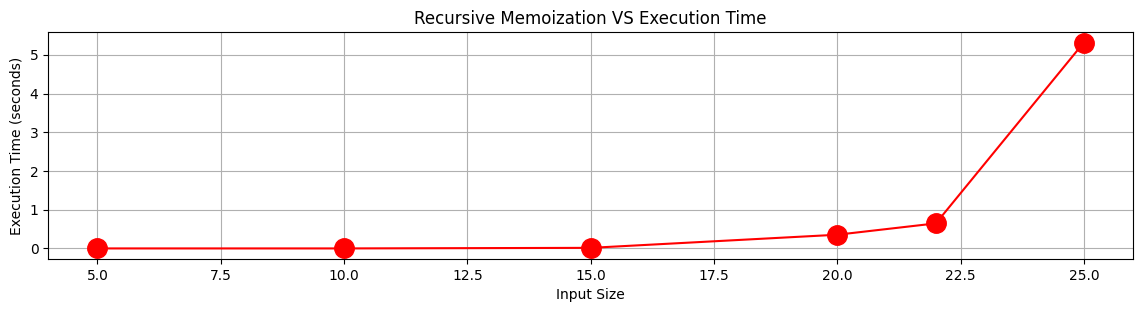

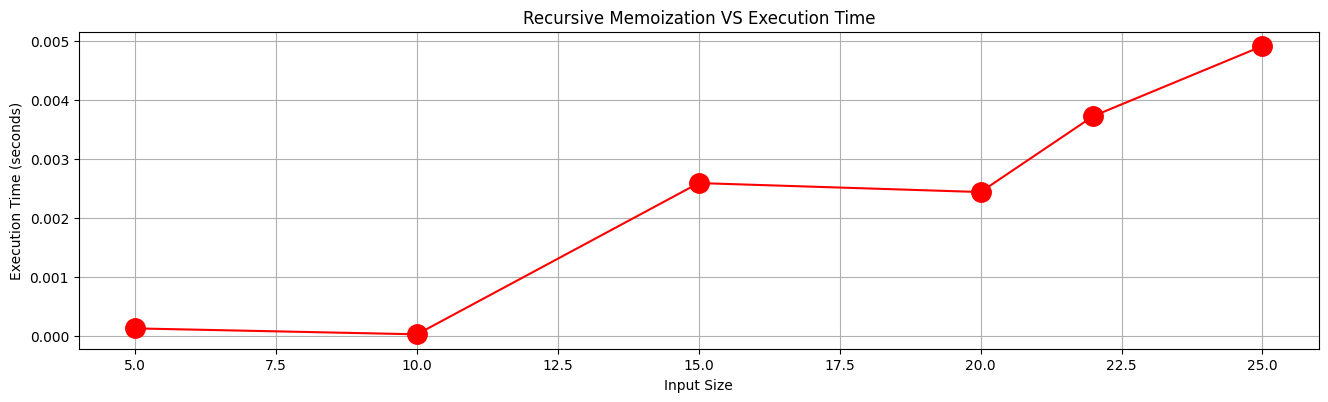

In [116]:
plt.figure(figsize=(14,10))
plt.subplot(3, 1, 1)
plt.plot(data_sizes,execution_times_recursive, marker='o',color='r',markersize=14)
plt.xlabel('Input Size')
plt.ylabel('Execution Time (seconds)')
plt.title('Recursive Memoization VS Execution Time')
plt.grid(True)
plt.show()

plt.figure(figsize=(16,14))
plt.subplot(3, 1, 2)
plt.plot(data_sizes,  execution_times_memoization, marker='o',color='r',markersize=14)
plt.xlabel('Input Size')
plt.ylabel('Execution Time (seconds)')
plt.title('Recursive Memoization VS Execution Time')
plt.grid(True)
plt.show()


    


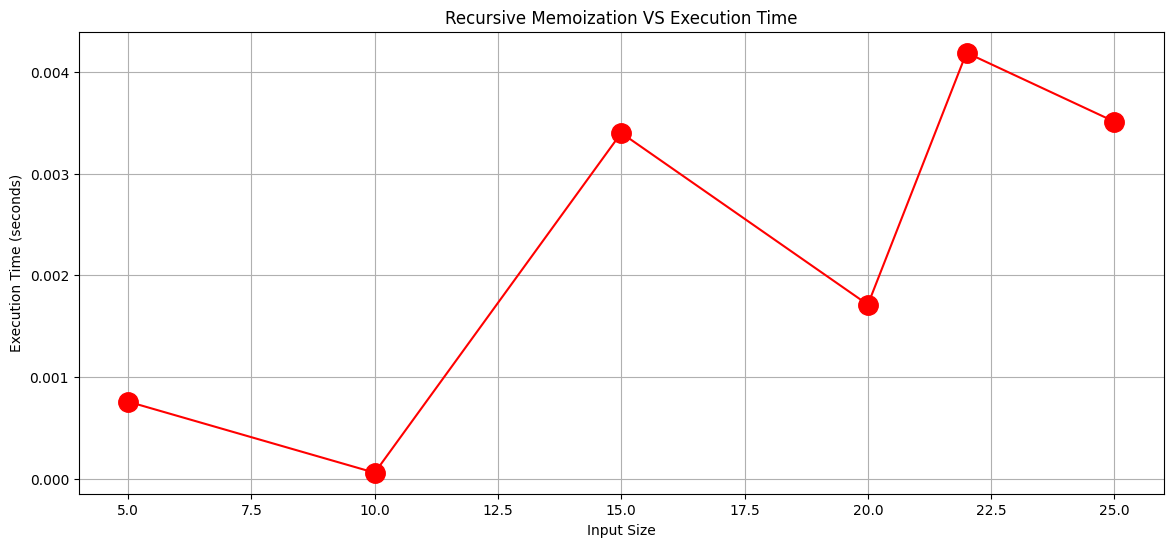

In [117]:

plt.figure(figsize=(14,6))
plt.plot(data_sizes, execution_times_bottom_up, marker='o',color='r',markersize=14)
plt.xlabel('Input Size')
plt.ylabel('Execution Time (seconds)')
plt.title('Recursive Memoization VS Execution Time')
plt.grid(True)
plt.show()

CALLS vs Problem

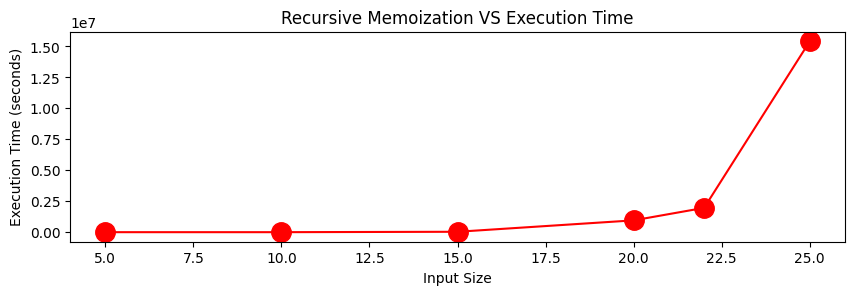

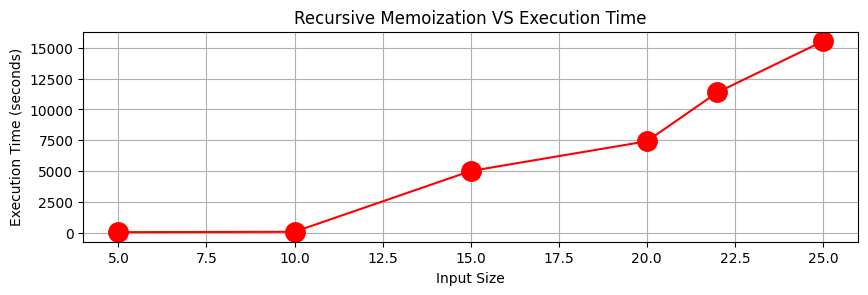

In [118]:

plt.figure(figsize=(10,6))
plt.subplot(2, 1, 1)
plt.plot(data_sizes, total_calls_recursive, marker='o',color='r',markersize=14)
plt.xlabel('Input Size')
plt.ylabel('Execution Time (seconds)')
plt.title('Recursive Memoization VS Execution Time')


plt.figure(figsize=(10,6))
plt.subplot(2, 1, 2)
plt.plot(data_sizes, total_calls_memoization, marker='o',color='r',markersize=14)
plt.xlabel('Input Size')
plt.ylabel('Execution Time (seconds)')
plt.title('Recursive Memoization VS Execution Time')
plt.grid(True)
plt.show()


    

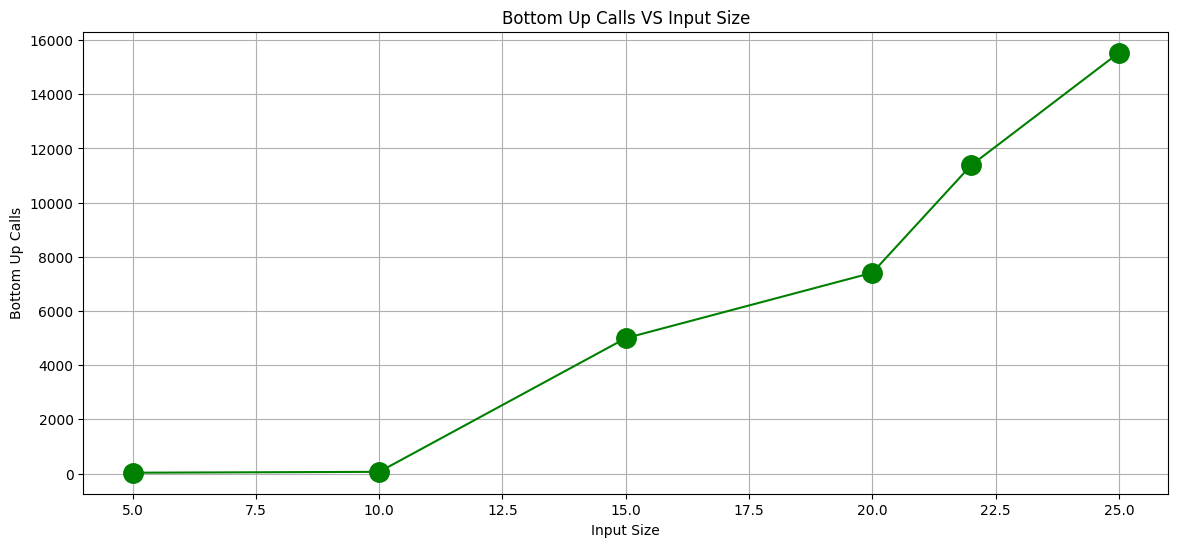

In [119]:
plt.figure(figsize=(14,6))
plt.plot(data_sizes, total_calls_bottom_up, marker='o',color='g',markersize=14)
plt.xlabel('Input Size')
plt.ylabel('Bottom Up Calls')
plt.title('Bottom Up Calls VS Input Size')
plt.grid(True)
plt.show()

DP ENTRIES:

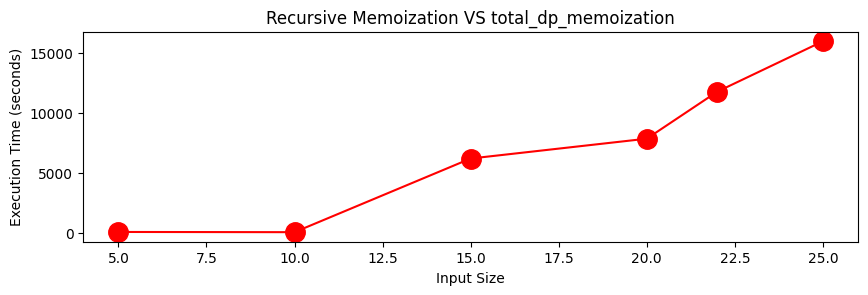

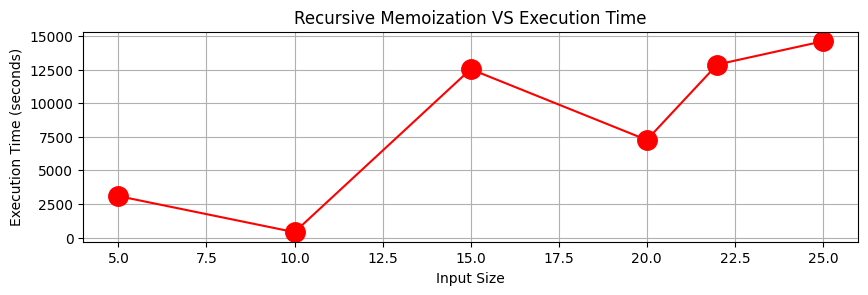

In [120]:

plt.figure(figsize=(10,6))
plt.subplot(2, 1, 1)
plt.plot(data_sizes,  total_dp_entries_memoization, marker='o',color='r',markersize=14)
plt.xlabel('Input Size')
plt.ylabel('Execution Time (seconds)')
plt.title('Recursive Memoization VS total_dp_memoization')

 
plt.figure(figsize=(10,6))
plt.subplot(2, 1, 2)
plt.plot(data_sizes,  total_dp_entries_bottom_up, marker='o',color='r',markersize=14)
plt.xlabel('Input Size')
plt.ylabel('Execution Time (seconds)')
plt.title('Recursive Memoization VS Execution Time')
plt.grid(True)
plt.show()

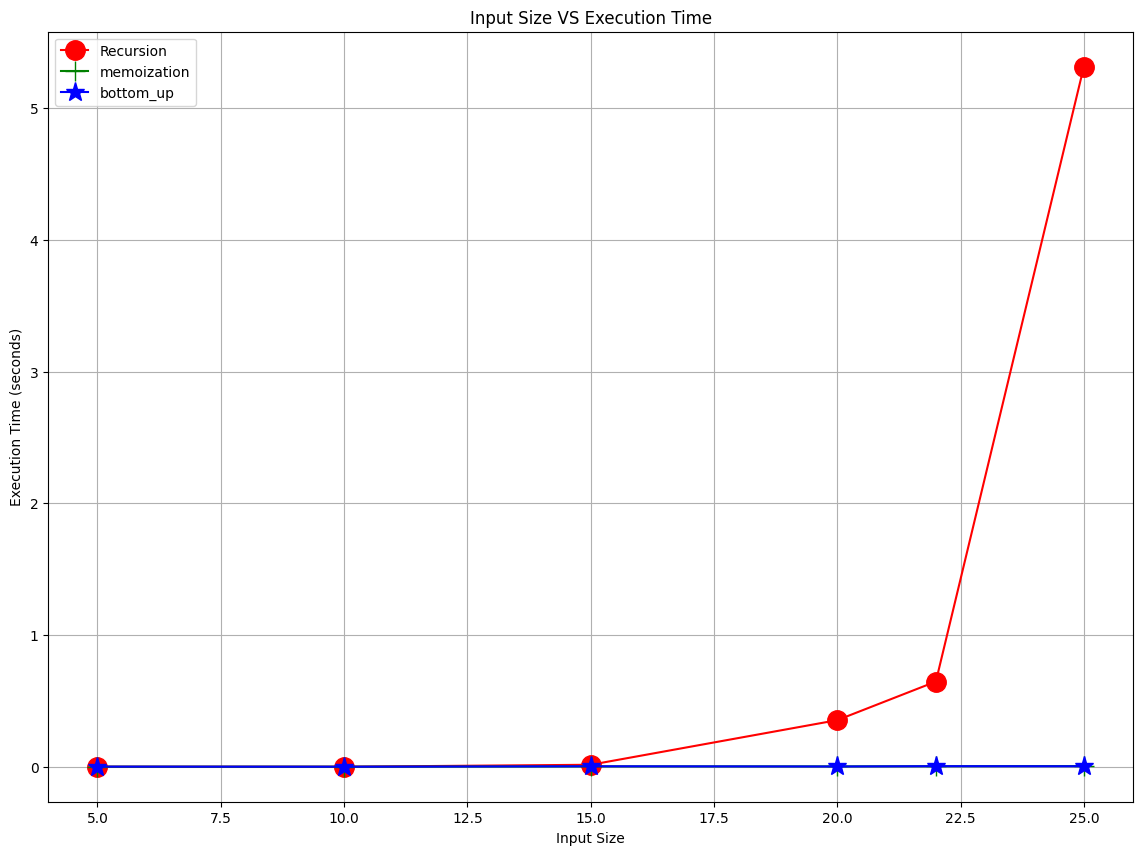

In [121]:
plt.figure(figsize=(14,10))
 
plt.plot(data_sizes,execution_times_recursive, marker='o',color='r',markersize=14,label='Recursion')
plt.plot(data_sizes,  execution_times_memoization, marker='+',color='g',markersize=14,label='memoization')
plt.plot(data_sizes, execution_times_bottom_up, marker='*',color='b',markersize=14,label='bottom_up')
plt.xlabel('Input Size')
plt.ylabel('Execution Time (seconds)')
plt.title('Input Size VS Execution Time')
plt.grid(True)
plt.legend()

plt.show()

 

## Best Top Down TestCase

In [122]:
import time
import random
execution_times_recursive = []
execution_times_memoization = []
execution_times_bottom_up = []
total_calls_recursive = []
total_calls_memoization = []
total_calls_bottom_up = []
total_dp_entries_recursive = []
total_dp_entries_memoization = []
total_dp_entries_bottom_up = []
def analyze_knapsack_algorithms(data_sizes):
    

    for n in data_sizes:
        weights = [random.randint(1, 100) for i in range(n)]
        values =  [1 for i in range(n)]
        capacity = 1000
        print(f"Data Size: {n}")

        # Recursive Algorithm
        start_time = time.perf_counter()
        result, calls, dp_entries = knapsack_recursive(capacity, weights, values, n)
        end_time = time.perf_counter()
        print(f"Recursive Algorithm - Time: {end_time - start_time}, Calls: {calls}, DP Entries: {dp_entries}")
        execution_times_recursive.append(end_time - start_time)
        total_calls_recursive.append(calls)
        total_dp_entries_recursive.append(dp_entries)

        # Recursive with Memoization
        start_time = time.perf_counter()
        result, calls, dp_entries = knapsack_memoization(capacity, weights, values, n)
        end_time = time.perf_counter()
        print(f"Memoization - Time: {end_time - start_time}, Calls: {calls}, DP Entries: {dp_entries}")
        execution_times_memoization.append(end_time - start_time)
        total_calls_memoization.append(calls)
        total_dp_entries_memoization.append(dp_entries)
         

        # Bottom-Up DP
        start_time = time.perf_counter()
        result, dp_entries = knapsack_bottom_up(capacity, weights, values, n)
        end_time = time.perf_counter()
        print(f"Bottom-Up DP - Time: {end_time - start_time}, DP Entries: {dp_entries}\n")
        execution_times_bottom_up.append(end_time - start_time)
        total_calls_bottom_up.append(calls)
        total_dp_entries_bottom_up.append(dp_entries)

    return (execution_times_recursive, execution_times_memoization, execution_times_bottom_up,
            total_calls_recursive, total_calls_memoization, total_calls_bottom_up,
            total_dp_entries_recursive, total_dp_entries_memoization, total_dp_entries_bottom_up)

data_sizes = [15]
results = analyze_knapsack_algorithms(data_sizes)



Data Size: 15
Recursive Algorithm - Time: 0.01487739999720361, Calls: 32767, DP Entries: 65535
Memoization - Time: 0.0023462999961338937, Calls: 5211, DP Entries: 6285
Bottom-Up DP - Time: 0.0036693000001832843, DP Entries: 15000



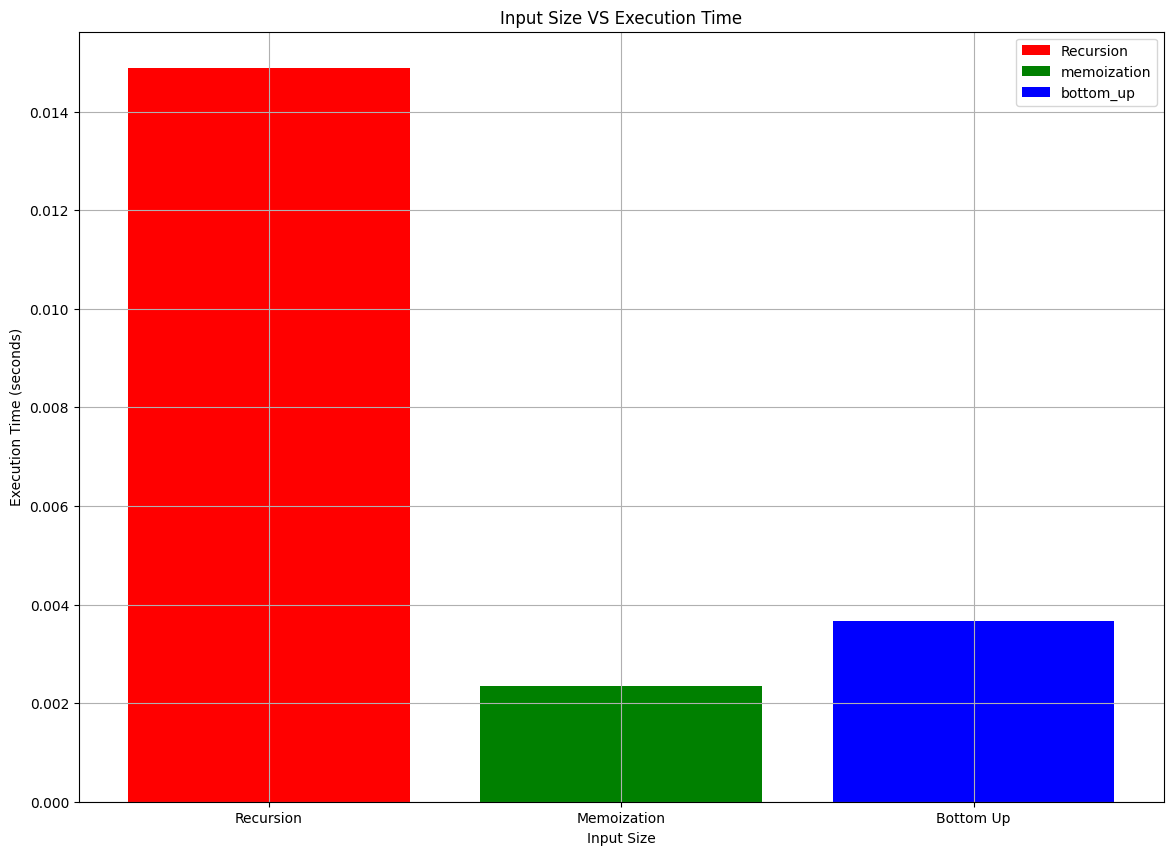

In [123]:

plt.figure(figsize=(14,10))

plt.bar("Recursion",execution_times_recursive, color='r', label='Recursion')
plt.bar("Memoization",  execution_times_memoization, color='g',label='memoization')
plt.bar("Bottom Up", execution_times_bottom_up,  color='b',label='bottom_up')
plt.xlabel('Input Size')
plt.ylabel('Execution Time (seconds)')
plt.title('Input Size VS Execution Time')
plt.grid(True)
plt.legend()
plt.show()

In [124]:
import time
import random
execution_times_recursive = []
execution_times_memoization = []
execution_times_bottom_up = []
total_calls_recursive = []
total_calls_memoization = []
total_calls_bottom_up = []
total_dp_entries_recursive = []
total_dp_entries_memoization = []
total_dp_entries_bottom_up = []
def analyze_knapsack_algorithms(data_sizes):
    

    for n in data_sizes:
        weights = [1 for i in range(n)]
        values = [random.randint(1, 100) for i in range(n)]
        capacity = 10
        print(f"Data Size: {n}")

        # Recursive Algorithm
        start_time = time.perf_counter()
        result, calls, dp_entries = knapsack_recursive(capacity, weights, values, n)
        end_time = time.perf_counter()
        print(f"Recursive Algorithm - Time: {end_time - start_time}, Calls: {calls}, DP Entries: {dp_entries}")
        execution_times_recursive.append(end_time - start_time)
        total_calls_recursive.append(calls)
        total_dp_entries_recursive.append(dp_entries)

        # Recursive with Memoization
        start_time = time.perf_counter()
        result, calls, dp_entries = knapsack_memoization(capacity, weights, values, n)
        end_time = time.perf_counter()
        print(f"Memoization - Time: {end_time - start_time}, Calls: {calls}, DP Entries: {dp_entries}")
        execution_times_memoization.append(end_time - start_time)
        total_calls_memoization.append(calls)
        total_dp_entries_memoization.append(dp_entries)
         

        # Bottom-Up DP
        start_time = time.perf_counter()
        result, dp_entries = knapsack_bottom_up(capacity, weights, values, n)
        end_time = time.perf_counter()
        print(f"Bottom-Up DP - Time: {end_time - start_time}, DP Entries: {dp_entries}\n")
        execution_times_bottom_up.append(end_time - start_time)
        total_calls_bottom_up.append(calls)
        total_dp_entries_bottom_up.append(dp_entries)

    return (execution_times_recursive, execution_times_memoization, execution_times_bottom_up,
            total_calls_recursive, total_calls_memoization, total_calls_bottom_up,
            total_dp_entries_recursive, total_dp_entries_memoization, total_dp_entries_bottom_up)

data_sizes = [5]
results = analyze_knapsack_algorithms(data_sizes)



Data Size: 5
Recursive Algorithm - Time: 5.169999349163845e-05, Calls: 31, DP Entries: 63
Memoization - Time: 3.659999492811039e-05, Calls: 21, DP Entries: 31
Bottom-Up DP - Time: 3.3899996196851134e-05, DP Entries: 50



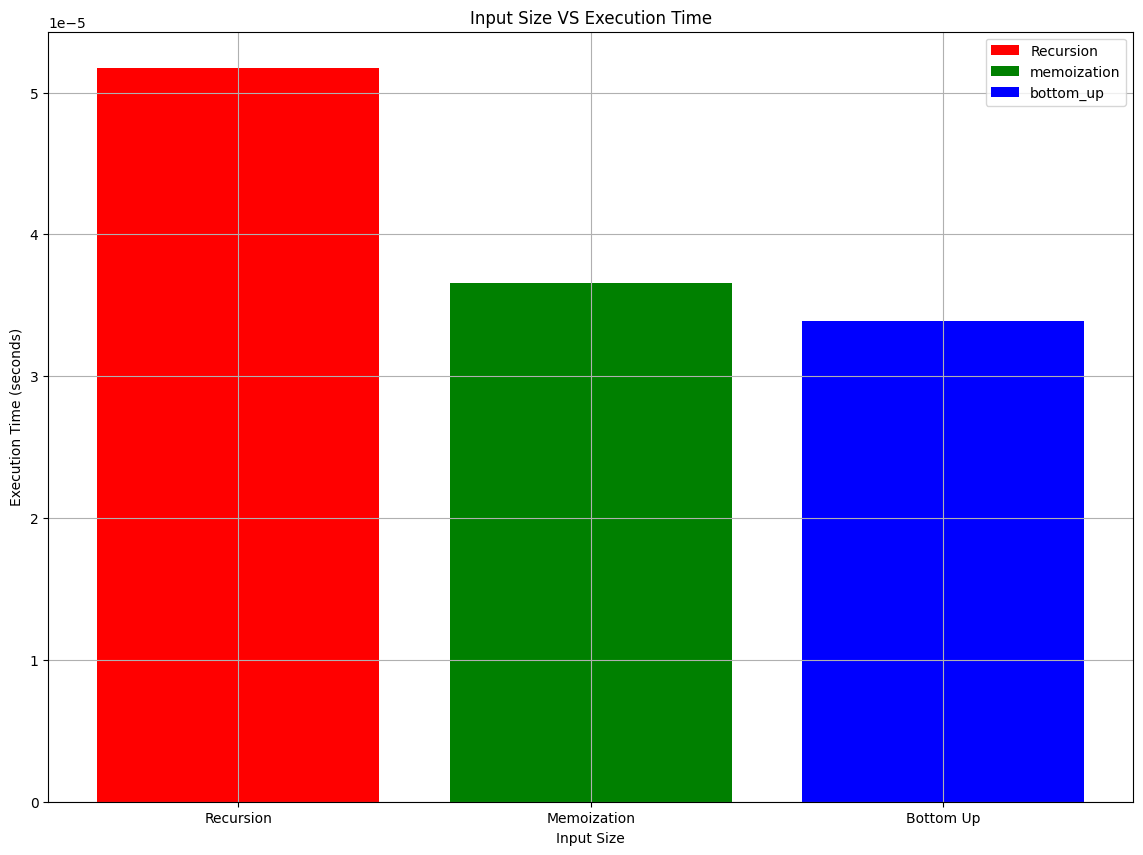

In [125]:
plt.figure(figsize=(14,10))

plt.bar("Recursion",execution_times_recursive, color='r', label='Recursion')
plt.bar("Memoization",  execution_times_memoization, color='g',label='memoization')
plt.bar("Bottom Up", execution_times_bottom_up,  color='b',label='bottom_up')
plt.xlabel('Input Size')
plt.ylabel('Execution Time (seconds)')
plt.title('Input Size VS Execution Time')
plt.grid(True)
plt.legend()
plt.show()

In [126]:
dp_memo = [27,261,1179,2237,3208]
dp_bottom_up = [414,1100,1768,2601,3700]

data = []
for i in range(len(dp_memo)):
    data.append([dp_memo[i],dp_bottom_up[i]])


In [127]:
df = pd.DataFrame(data,columns= ['dp_memo','dp_bottom_up'])
df

,dp_memo,dp_bottom_up
0,27,414
1,261,1100
2,1179,1768
3,2237,2601
4,3208,3700


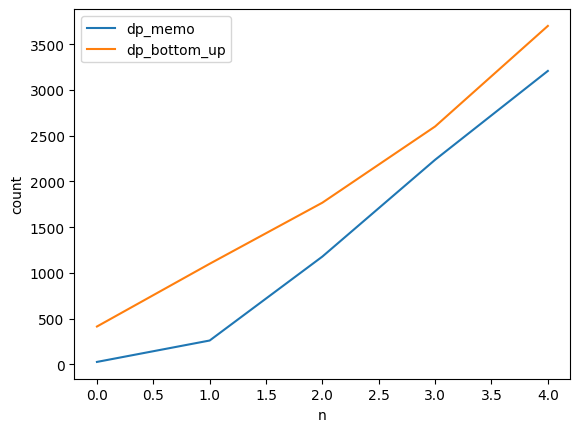

In [128]:
import matplotlib.pyplot as plt
plt.plot(df.index,df['dp_memo'],label='dp_memo')
plt.plot(df.index,df['dp_bottom_up'],label='dp_bottom_up')
plt.xlabel('n')
plt.ylabel('count')
plt.legend()
plt.show()

TOP Down - Small knapsack

Bottom Down - Large Knapsack